
Training columns:

                                            filepaths  labels
0  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
1  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
2  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
3  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
4  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma

Testing columbs:

                                            filepaths  labels
0  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
1  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
2  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
3  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
4  /Users/oorti/OneDrive/Desktop/MachineLearningP...  glioma
Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


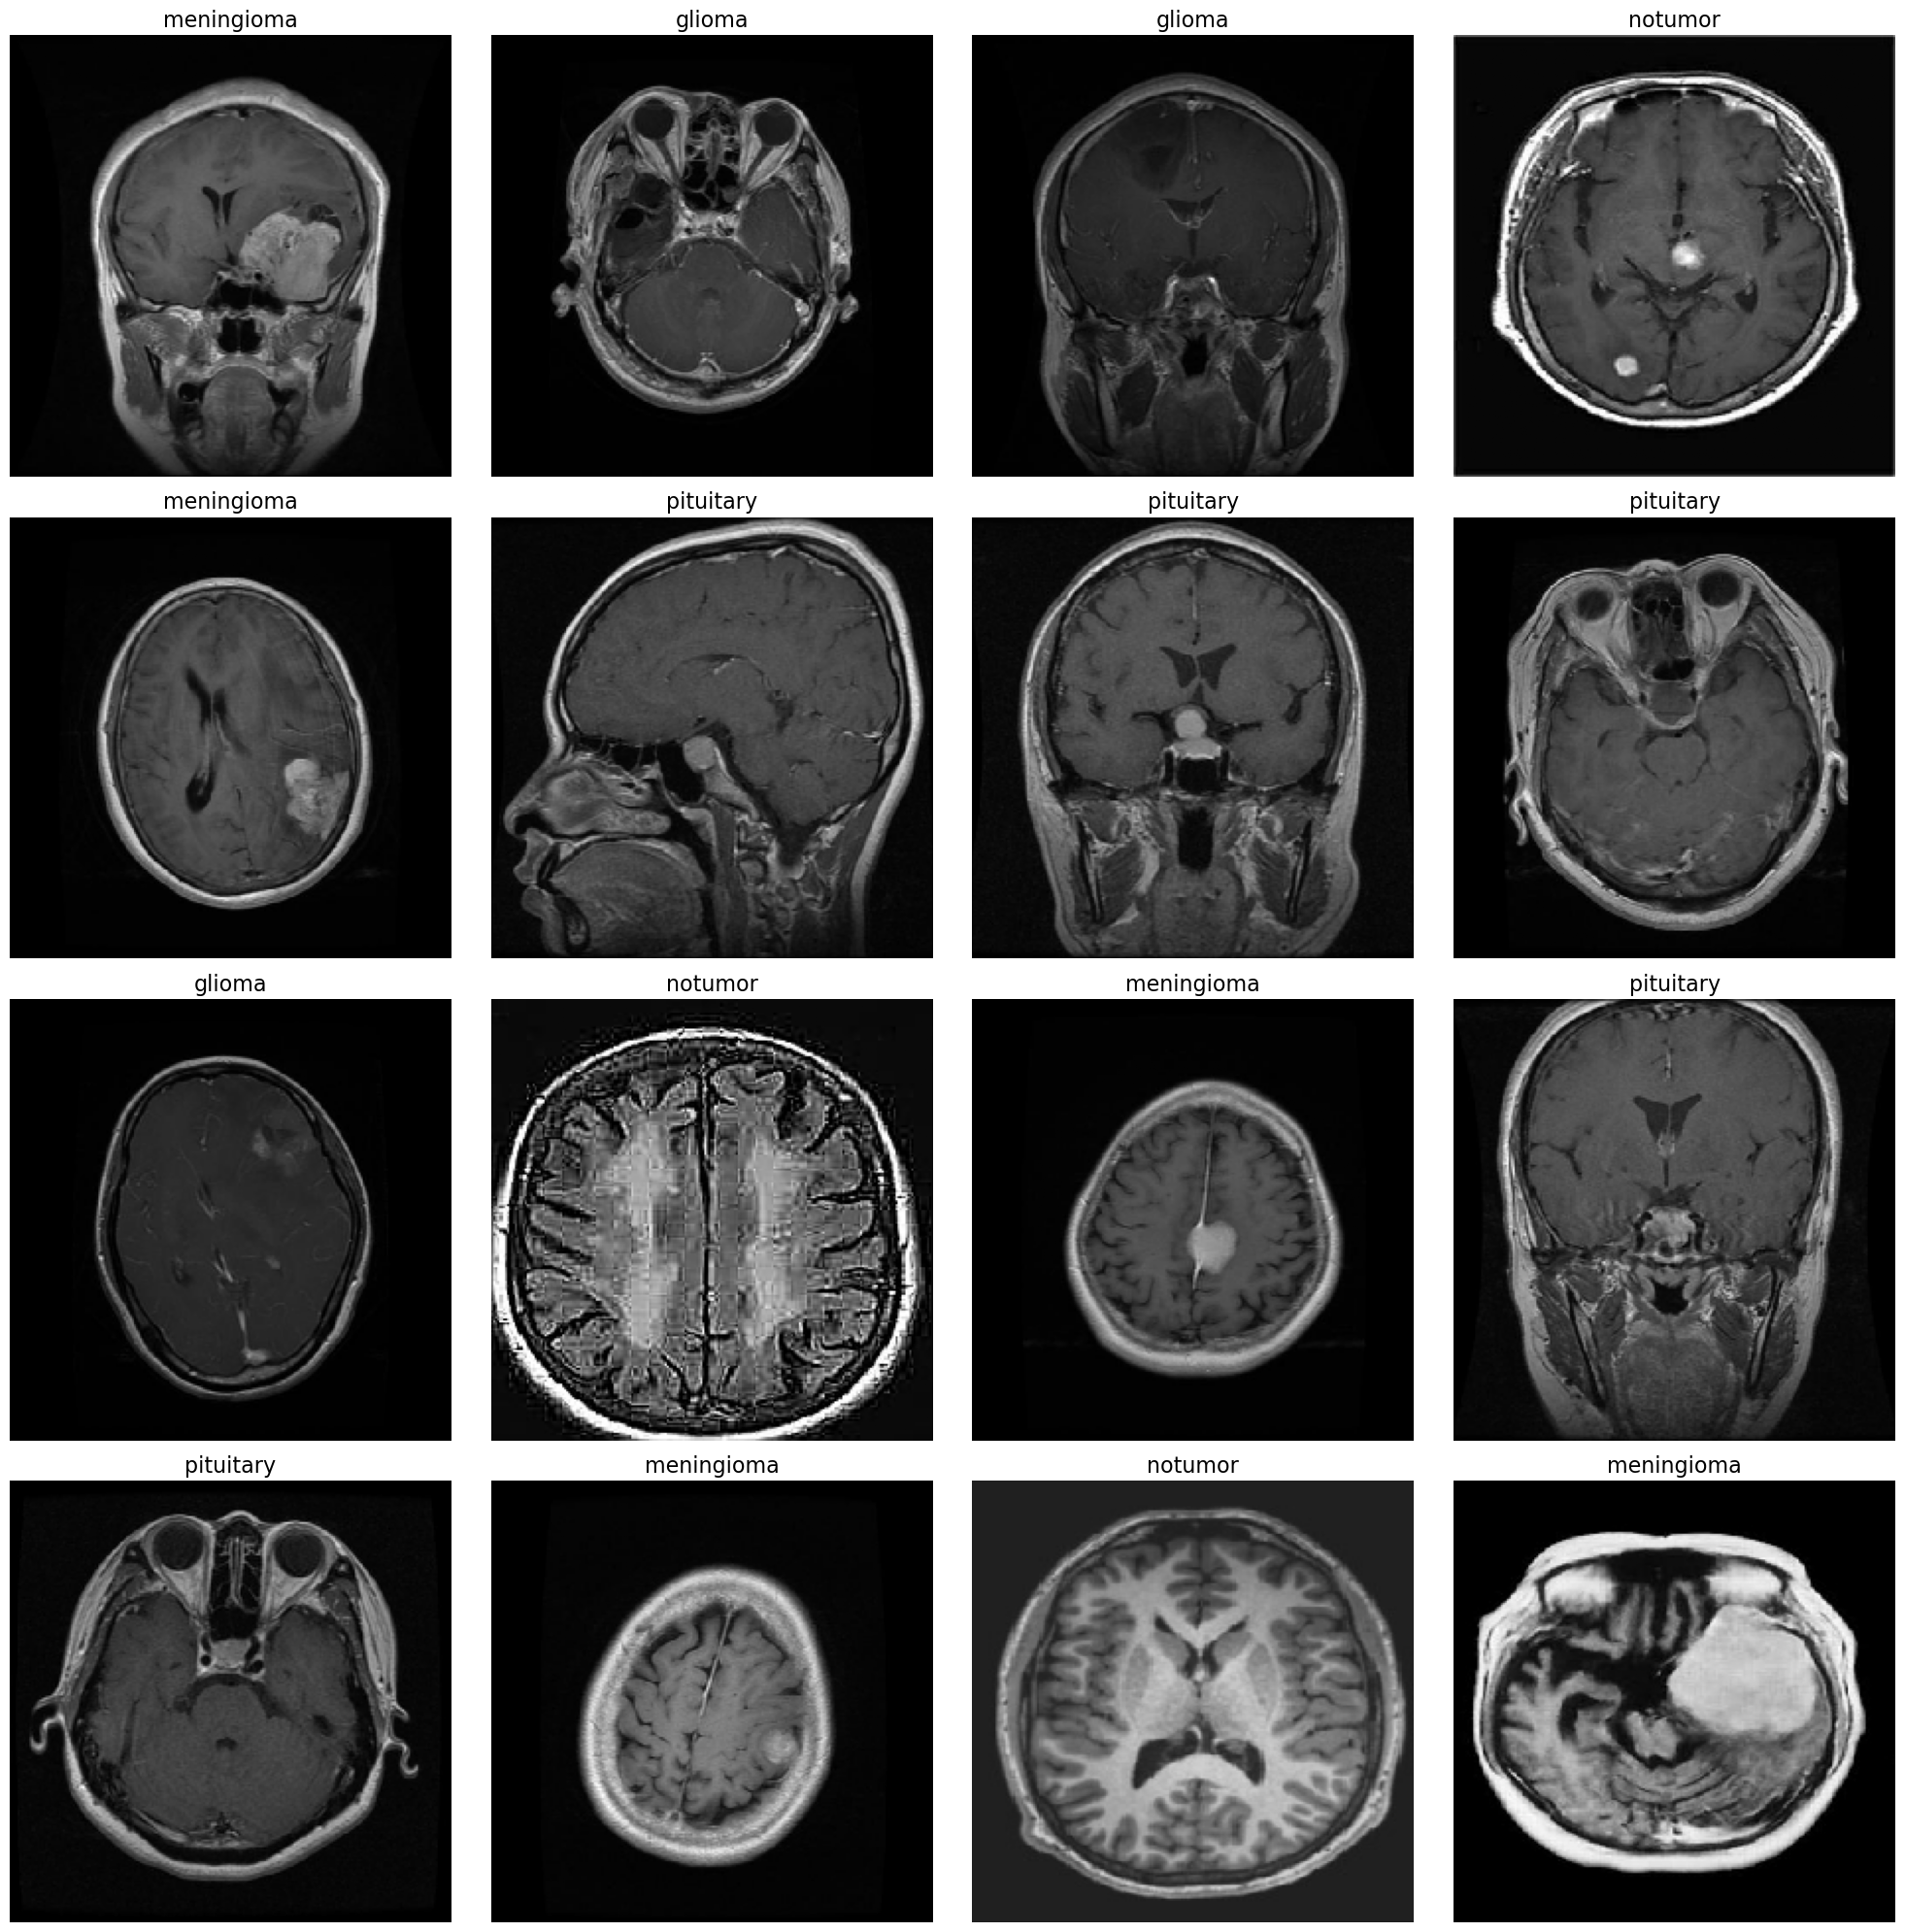

In [5]:
import sklearn as sk 
import numpy as np 
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn 
import torchvision 
from torchvision import datasets, models, transforms
import time 
import matplotlib.pyplot as plt 
import os 
from PIL import Image 
from tempfile import TemporaryDirectory
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator


cudnn.benchmark = True 
plt.ion()#interactive mode on, comment out to remove


def loadingImages(data_dir):
    filepaths = []
    labels = []

    # collecting subfolders
    folders = os.listdir(data_dir)

    for fold in folders:
        # fold is a directory
        if not os.path.isdir(os.path.join(data_dir, fold)):
            continue
        
        subfolder_path = os.path.join(data_dir, fold)
        filelist = os.listdir(subfolder_path)
        for file in filelist:
            # path to each image file
            imageFilePath = os.path.join(subfolder_path, file)
            
            # append the file path and label
            filepaths.append(imageFilePath)
            labels.append(fold)

    #1D pandas Series for easy traversal
    FileSeries = pd.Series(filepaths, name='filepaths')
    labelSeries = pd.Series(labels, name='labels')

    # Combine/concatanate series into one panda df
    df = pd.concat([FileSeries, labelSeries], axis=1)

    return df


#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=
#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=
#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=
# change file directory, will update to use os to scan through all of computer
train_data_dir = '/Users/oorti/OneDrive/Desktop/MachineLearningProject/MachineLearningHistology/TestingImages/Training'
test_data_dir = '/Users/oorti/OneDrive/Desktop/MachineLearningProject/MachineLearningHistology/TestingImages/Testing'
train_df = loadingImages(train_data_dir)
test_df = loadingImages(test_data_dir)
#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=
#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=
#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=#=-=-=-=-=-=-=


#Testing to amke sure df were created.
print(f'\nTraining columns:\n\n {train_df.head()}')
print(f'\nTesting columbs:\n\n {test_df.head()}')

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
#splitting data for test
true_df, df_testing = train_test_split(test_df, train_size= 0.5, shuffle=True, random_state=42)# standard training value

#convert image datgaframes into array: 
batch_size = 16
image_size = (224,224) #resizing image
def create_generators(train_df, valid_df, test_df):
    tr_gen = ImageDataGenerator()
    tst_gen = ImageDataGenerator()
    
    train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
    valid_gen = tst_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
    test_gen = tst_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=image_size, class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
    
    return train_gen, valid_gen, test_gen


# Visualizing images from the training generator
def visualize_training_images(train_gen, classes=None, batch_size=16):
    if classes is None:
        g_dict = train_gen.class_indices #dictionary: {class: index}
        classes = list(g_dict.keys()) #list of dictionary keys: classes
    images, labels = next(train_gen) #get batch sample from generator
    
    plt.figure(figsize=(20, 20))
    for i in range(min(batch_size, len(images))):
        plt.subplot(4, 4, i + 1)
        image = images[i] / 255  # Scales data to range (0 - 1)
        plt.imshow(image)
        index = np.argmax(labels[i])  # image index
        class_name = classes[index]  # classification of image
        plt.title(class_name, color='black', fontsize=16)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#use of generator and view batch: 
train_gen, valid_gen, test_gen = create_generators(train_df, true_df, test_df)
visualize_training_images(train_gen)